In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
big_data = {}

for h_factor in [0.1, 2.0]:
    file_name = f'data_h={h_factor:.1f}hc/bridge_data'
    with open(file_name, 'rb') as file:
        big_data[h_factor] = pickle.load(file)

In [3]:
size = 24
font_size = size
tklab_size = size
label_size = size
legend_size = size - 5
width_plot = 4
aspect_ratio = 0.54
heigth_plot  = width_plot*aspect_ratio

from matplotlib import rc, rcParams
rc("font", family="serif", size=font_size)
rc("text", usetex=True)

import matplotlib.ticker

rcParams['xtick.major.pad'] = 8
rcParams['ytick.major.pad'] = 8
rcParams["figure.figsize"] = (5,3.)
rcParams["figure.dpi"]     = 100
rcParams["lines.linewidth"]     = 2
rcParams["axes.labelsize"]      = label_size
rcParams["xtick.minor.visible"] = True
rcParams["xtick.major.size"]    = 4
rcParams["xtick.minor.size"]    = 2
rcParams["xtick.major.width"]   = 0.7
rcParams["xtick.minor.width"]   = 0.55
rcParams["xtick.direction"]     = "in"
rcParams["ytick.minor.visible"] = True
rcParams["ytick.major.size"]    = 4
rcParams["ytick.minor.size"]    = 2
rcParams["ytick.major.width"]   = 0.7
rcParams["ytick.minor.width"]   = 0.55
rcParams["ytick.direction"]     = "in"
rcParams["xtick.labelsize"]     = tklab_size
rcParams["ytick.labelsize"]     = tklab_size
rcParams["legend.fontsize"]     = legend_size
rcParams["legend.handlelength"] = 1
rcParams["legend.columnspacing"] = 1
rcParams["axes.formatter.limits"] = -4, 4

/Users/adrien.kahn/Desktop/uvenv/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/adrien.kahn/Desktop/uvenv/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


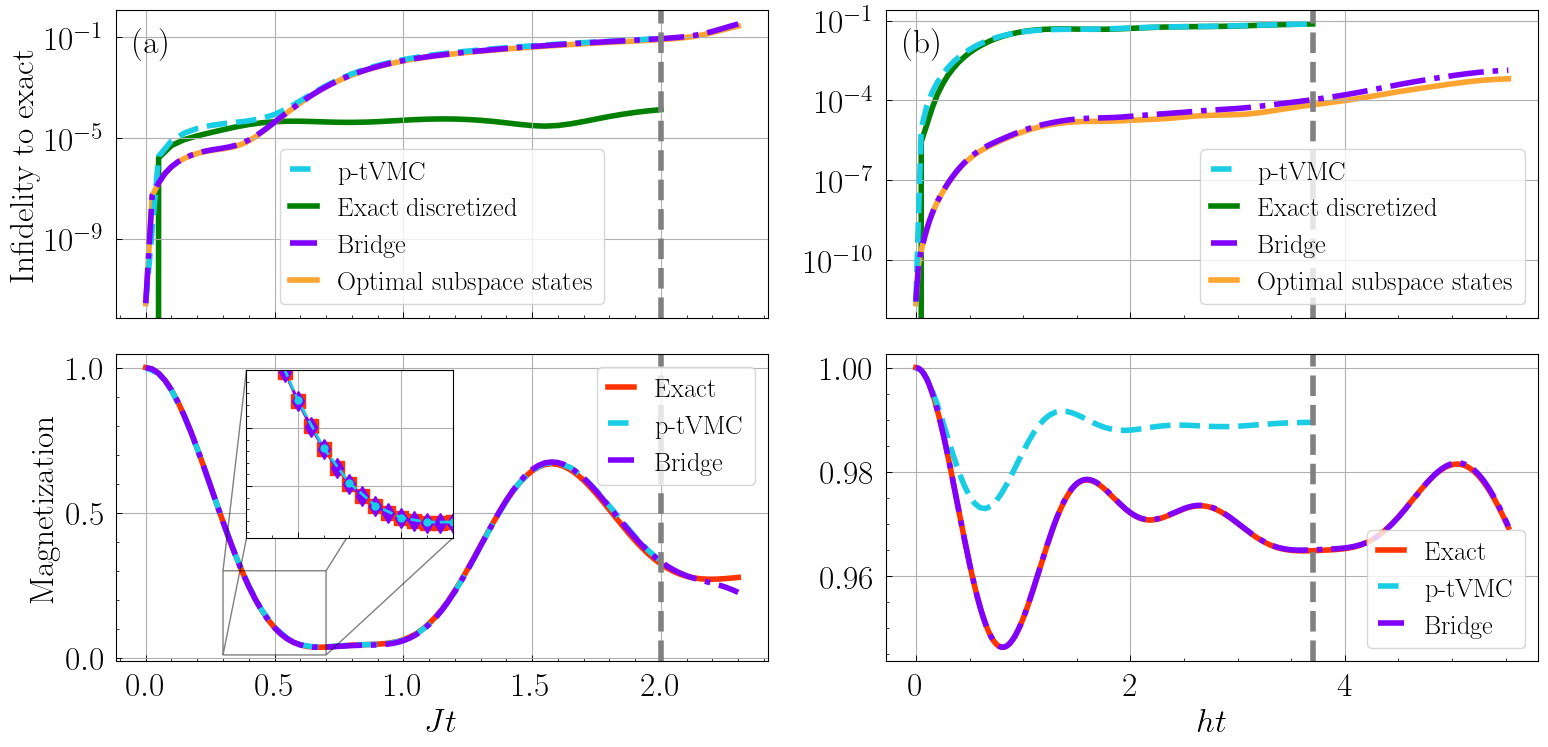

In [4]:
c_1 = cm.rainbow(0.1)
c_2 = cm.rainbow(0.3)
c_3 = cm.rainbow(0)
c_4 = cm.turbo(0.7)

exact_color = cm.autumn(0.2)
discretized_color = 'g'
ptvmc_color = c_2
bridge_color = c_3
optimal_color = c_4

exact_m = None
discretized_m = None
ptvmc_m = None
bridge_m = None
optimal_m = None

exact_ls = '-'
discretized_ls = '-'
ptvmc_ls = '--'
bridge_ls = '-.'
optimal_ls = '-'

ms = 2
lw = 4

fig, ax = plt.subplots(2, 2, figsize=(16,8), tight_layout=True, sharex='col', sharey=False)

for k, (h_factor, data) in enumerate(big_data.items()):
    
    if h_factor == 0.1:
        x_label = "$J t$"
        times_factor = 1
    
    if h_factor == 2.:
        x_label = "$h t$"
        times_factor = h_factor * 3.044
    
    # Infidelity
    ax[0,k].plot(data['times']*times_factor, data['midpoint_infidelities'], ls=ptvmc_ls, ms=ms, lw=lw, marker=ptvmc_m, c=ptvmc_color, label='p-tVMC')
    ax[0,k].plot(data['times']*times_factor, data['discretized_infidelities'], ls=discretized_ls, ms=ms, lw=lw, marker=discretized_m, c=discretized_color, label='Exact discretized', zorder=-2)
    ax[0,k].plot(data['big_times']*times_factor, data['bridge_states_infidelities'], ls=bridge_ls, ms=ms, lw=lw, marker=bridge_m, c=bridge_color, label='Bridge')
    ax[0,k].plot(data['big_times']*times_factor, data['optimal_infidelities'], ls=optimal_ls, ms=ms, lw=lw, marker=optimal_m, c=optimal_color, label='Optimal subspace states', zorder=-1)
    ax[0,k].axvline(data['times'][-1]*times_factor, ls='--', c='gray', lw=lw)
    
    ax[0,k].set_yscale('log')
    ax[0,k].grid()
    ax[0,k].legend()
    #ax[0,k].set_ylim(1e-12, 1e-1)
    

    
    # Magnetization
    ax[1,k].plot(data['big_times']*times_factor, data['exact_dynamics_total_x'], ls=exact_ls, ms=ms, lw=lw, marker=exact_m, c=exact_color, label='Exact')
    ax[1,k].plot(data['times']*times_factor, data['midpoint_total_x'], ls=ptvmc_ls, ms=ms, lw=lw, marker=ptvmc_m, c=ptvmc_color, label='p-tVMC')
    ax[1,k].plot(data['big_times']*times_factor, data['bridge_states_total_x'], ls=bridge_ls, ms=ms, lw=lw, marker=bridge_m, c=bridge_color, label='Bridge')
    ax[1,k].axvline(data['times'][-1]*times_factor, ls='--', c='gray', lw=lw)
    ax[1,k].grid()
    ax[1,k].legend()
    ax[1,k].set_xlabel(x_label)
    #ax[1,k].set_ylim(1e-14, 1e-4)


ax[0,0].set_ylabel('Infidelity to exact')
ax[1,0].set_ylabel('Magnetization')

ax[1,1].legend(loc='lower right')






# Zoom in on part of the plot from ax
ax_x1, ax_x2 = ax[1,0].get_xlim()
ax_y1, ax_y2 = ax[1,0].get_ylim()

width = ax_x2 - ax_x1
height = ax_y2 - ax_y1

x1, x2 = 0.3, 0.7
y1, y2 = 0.01, 0.3

zoom = 2

ax_inset = ax[1, 0].inset_axes([0.2, 0.4, zoom * (x2 - x1) / width, zoom * (y2 - y1) / height])

exact_m = 's'
ptvmc_m = '.'
bridge_m = 'd'

ms = 10
lw = 2

# Magnetization
data = big_data[0.1]
times_factor = 1
ax_inset.plot(data['big_times']*times_factor, data['exact_dynamics_total_x'], ls=exact_ls, ms=ms, lw=lw, marker=exact_m, c=exact_color, label='Exact')
ax_inset.plot(data['big_times']*times_factor, data['bridge_states_total_x'], ls=bridge_ls, ms=ms, lw=lw, marker=bridge_m, c=bridge_color, label='Bridge')
ax_inset.plot(data['times']*times_factor, data['midpoint_total_x'], ls=ptvmc_ls, ms=ms, lw=lw, marker=ptvmc_m, c=ptvmc_color, label='p-tVMC')
ax_inset.grid()


# Specify the zoom-in region
ax_inset.set_xlim(x1, x2)
ax_inset.set_ylim(y1, y2)
ax_inset.set_xticklabels('')
ax_inset.set_yticklabels('')
#ax_inset.grid()

inset_indicator = ax[1,0].indicate_inset_zoom(ax_inset, edgecolor="black")
inset_indicator.connectors[0].set_visible(True)
inset_indicator.connectors[1].set_visible(True)
inset_indicator.connectors[2].set_visible(True)
inset_indicator.connectors[3].set_visible(True)

for a, label in zip(ax[0], ['(a)', '(b)']):
    a.annotate(label, xy=(0, 1), xycoords='axes fraction', xytext=(+0.5, -0.5), textcoords='offset fontsize', fontsize=label_size, verticalalignment='top')

#fig.savefig('bridge.pdf', bbox_inches="tight")